# A set of Nuclear Physics formulas

Net current is the sum of all currents (in this case we are finding it using the intensity of each current)

In [3]:
#Finding net current using intensity(flux)
import math
def net_current(flux1,flux2):
    a = math.pi / 4
    tenpower=10**0
    flux1*=tenpower
    flux2*=tenpower
    negi=flux2*math.cos(a)
    posi=flux1*math.cos(a)
    netCurr=posi-negi
    return(netCurr)
net_current(1,2)

-0.7071067811865476

Total Flux is the sum of all fluxes (intensities)

In [4]:
#Calculating the total flux
def total_flux(flux1, flux2):
    totalFlux=flux1+flux2
    print('{}*10^0 n/cm*s'.format(totalFlux))
total_flux(1,2)

3*10^0 n/cm*s


The current vector is the integral/sum of fluxes with the direction vector

In [5]:
#Calculating the current vector at point 0
def current_vector(flux1, flux2):
    x1=(flux2**flux2)+(flux1**flux1)
    sym='√'
    x=round(math.sqrt(x1), 2)
    print('{}{} or {}*10^0 n/cm*s'.format(sym,x1,x))
current_vector(1,2)

√5 or 2.24*10^0 n/cm*s


Cross section is the measure of probability that a specific process will take place in a collision of two particles

In [6]:
#Variable declaration
t = 10**-5; # Thickness of Li(3,7), m
d = 500; # Density, Kg/m^3
N = 6.023e+026; # Number of  nuclei in 7-Kg of Li-7
M = 7 ; # Molar mass of Li

#Calculations
n = d*N*t/M; # Number of Li(3,7) nuclei/area
N_p = 10**8; # Number of neutron produced/s
N_0 = 10**13; # Number of incident particle striking/unit area of target
C_s = N_p/(N_0*n*10**(-28)); #  Cross section, b

#Result
print ("Cross section : %5.3f b"%C_s)

Cross section : 0.232 b


Atomic weight is the mass of all natural isotopes in an atom

In [31]:
#finding atomic weights in amu

#declaration of variables:
Z = 6    #atomic number
M_p = 1.0072765    #mass of a proton (amu)
m_n = 1.0086654    #mas of a neutron (amu)
N = 6    #amount of neutrons
A = N+Z    #mass number
delta = mass_defect(M, Z, N, A, m_h, m_n)    #mass defect

def atomic_weights(Z, M_p, M_n, A, delta):
    firstPart = Z*M_p
    secPart = A - Z
    thirdPart = M_n * secPart
    m_nucl = firstPart+thirdPart-delta
    return(m_nucl)
atomic_weights(Z, M_p, m_n, A, delta)

11.996858999999999

Binding Energy is the minimum energy that would be required to disassemble its nucleus

In [29]:
#finding total binding energy (B) of a nucleus

#declaration of variables:
power = 10**8
Z = 6   #atomic number
c = 2.99792458*power    #speed of light in a vacuum
M_p = 1.0072765    #mass of a proton (amu)
N = 6    #amount of neutrons
A = N+Z    #mass number
m_n = 1.0086654    #mass of a neutron (amu)
m_nucl = atomic_weights(Z, M_p, m_n, A, delta)
U = (c**2)*m_nucl    #total energy of the nucleus

def binding_E(Z, m_p, c, A, m_n, U):
    B = (Z*m_p*(c**2))+((A-Z)*m_n*(c**2))-U
    return(B)
binding_E(Z, M_p, c, A, m_n, U)

9.953334329824806e+16

Binding fraction is the binding energy per nuclear particle

In [9]:
#Calculating the binding fraction (total binding energy per nuclear particle)

#declaration of variables:
B = binding_E(Z, M_p, c, A, m_n, U)    #total binding energy
A = N+Z    #mass number

def binding_frac(B, A):
    binding_frac=B/A
    return(binding_frac)
binding_frac(B, A)

1.4979252978946954e+16

Mass defect is the difference between the mass of an isotope and its mass number

In [30]:
#Finding the mass defect (delta)

#declaration of variables:
M = 12 #mass of the atom (amu)
Z = 6   #atomic number
N = 6    #amount of neutrons
A = N+Z    #mass number
m_h = 1.0078    #mass of a H-1 atom (amu)
m_n = 1.0087    #mass of a neutron

def mass_defect(M, Z, N, A, m_h, m_n):
    firstPart = Z*m_h
    secPart = (A - Z)*m_n
    delta = firstPart + secPart - M
    return(delta)
mass_defect(M, Z, N, A, m_h, m_n)

0.0990000000000002

Separation energy is the amount of energy it takes to remove a particle from its nucleus

In [13]:
#finding the separation energy of particles

#declaration of variables:
#declaration of variables:
power = 10**8
Z = 6   #atomic number
c = 2.99792458*power    #speed of light in a vacuum
M_p = 1.0072765    #mass of a proton (amu)
N = 6    #amount of neutrons
A = N+Z    #mass number
m_n = 1.0086654    #mass of a neutron (amu)
m_nucl = atomic_weights(Z, M_p, m_n, A, delta)
U = (c**2)*m_nucl    #total energy of the nucleus
amountNeu = 1    #amount of neutrons being separated
amountPro = 0    #amount of protons being separated

def separation_E(Z, m_p, c, A, m_n, U, amountNeu, amountPro):
    B1 = binding_E(Z, m_p, c, A, m_n, U)
    m_nucl = atomic_weights(Z-amountPro, M_p, m_n, A, delta)
    U2 = (c**2)*m_nucl    #total energy of the nucleus
    B2 = binding_E(Z-amountPro, m_p, c, A-(amountPro+amountNeu), m_n, U2)
    sep_energy = B1+B2
    return(sep_energy)
separation_E(Z, M_p, c, A, m_n, U, amountNeu, amountPro)

2.688477463084626e+17

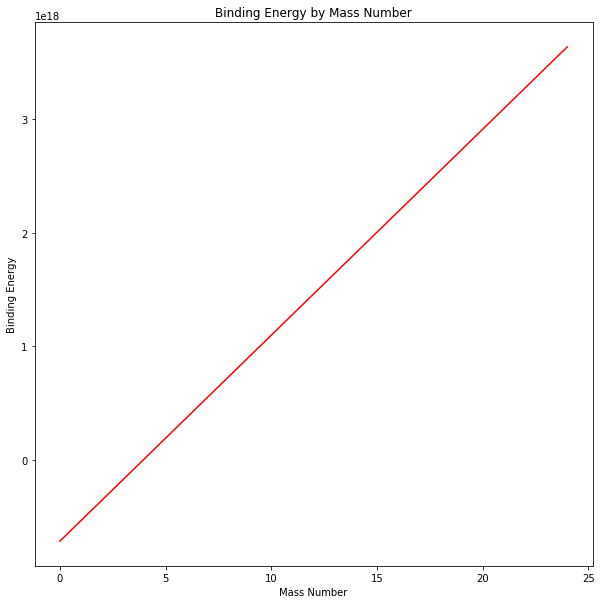

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, speed_of_light
x = []
y = []

c = speed_of_light
amountNeu = 1
m_p = 1.0072765    #mass of a proton (amu)
m_n = 1.0086654    #mass of a neutron (amu)
m_nucl = atomic_weights(Z, m_p, m_n, A, mass_defect(M, Z, N, A, m_h, m_n))    #mass of the nucleus
U = (c**2)*m_nucl    #total energy of the nucleus
Z = 2
A = Z*2
for i in range(25):
    m_nucl = atomic_weights(Z, M_p, m_n, A, mass_defect(M, Z, N, A, m_h, m_n))    #mass of the nucleus
    U = (c**2)*m_nucl    #total energy of the nucleus
    y.append(binding_E(Z, m_p, c, A, m_n, U))
    x.append(A)
    Z += 1
    A = Z*2
plt.title('Binding Energy by Mass Number') 
plt.ylabel('Binding Energy') 
plt.xlabel('Mass Number') 
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(y, color = 'red')
plt.show()

In [23]:
#Radius of a Nucleus

#declaration of variables:
r_0 = 1.46
Z = 4   #atomic number
N = 5    #amount of neutrons
A = N+Z    #mass number

def nucleus_R(r_0, A):
    R = r_0*(A**(1/3))
    return(R)
nucleus_R(r_0, A)

3.03692238165578

In [18]:
#separation energy of protons when Z = N
from scipy.constants import e
#declaration of variables:
Z = 6   #atomic number
N = 6    #amount of neutrons
A = N+Z    #mass number
S_v = separation_E(Z, M_p, c, A, m_n, U, 1, 0)    #neutron separation energy
R = nucleus_R(r_0, A)    #Radius of a neutron
e = e

def separation_E_P(Z, R, e, S_v):
    S_c = ((Z-1)*(e**2))/R
    S_p = S_v - S_c
    return(S_p)
separation_E_P(Z, R, e, S_v)

2.688477463084626e+17

The Columb barrier is the energy barrier 2 particles have to overcome to do a nuclear reaction

In [22]:
#Columb barrier description

#declaration of variables:
Z = 6
R = 3.342565588255729
S_p = 2.688477463084626e+17
S_c = ((Z-1)*(e**2))/R
S_n = 2.688477463084626e+17    #neutron separation energy
Excit_E = 3000

def columb_barrier_info(S_p, S_c, Excit_E, S_n):
    B_height = (S_p + S_c) - Excit_E
    Neu_E = Excit_E - S_n
    Pro_E = Excit_E - S_p
    print('Barrier height:',B_height)
    print('Neutron energy:',Neu_E)
    print('Proton energy:',Pro_E)
columb_barrier_info(S_p, S_c, Excit_E, S_n)

Barrier height: 2.688477463084596e+17
Neutron energy: -2.688477463084596e+17
Proton energy: -2.688477463084596e+17


An alpha particle is 2 neutrons and 2 protons.

In [24]:
#separation energy for alpha particles (MeV) :

#declaration of variables:
Z = 6
N = 7
A = N+Z
R_prime = 3.03692238165578
e = e
M_p = 1.0072765    #mass of a proton (amu)
m_n = 1.0086654    #mass of a neutron (amu)
delta = mass_defect(M, Z, N, A, m_h, m_n)
m_nucl = atomic_weights(Z, M_p, m_n, A, delta)
U = (c**2)*m_nucl    #total energy of the nucleus
S_vAplha = separation_E(Z - 2, M_p, c, A - 4, m_n, U, 2, 2)

def separation_E_Alpha(S_vAplha, e, R_prime, N, Z):
    S_cALpha = (2*(Z-2)*(e**2))/R_prime
    S_alpha = S_vAplha - S_cALpha
    return(S_alpha)
separation_E_Alpha(S_vAplha, e, R_prime, N, Z)

-5.2591825868006886e+17